Цифровая (относительная,
нормированная) частота. Формально такая частота определяется как
отношение реальной частоты к частоте дискретизации:
$f_0 = F_0/F_д,$ где $F_д = 1/T$ - частота дискретизации,
T – интервал между отчетами сигнала.
Значение  $1/F_0$ точности
соответствует числу точек на период для гармонического сигнала.

#**Упражнения 1-2. Демонстрация теоремы Котельникова.**

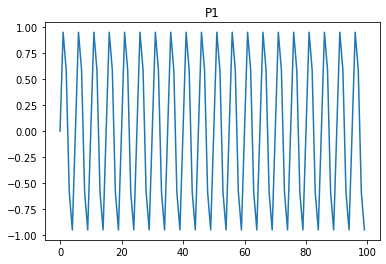

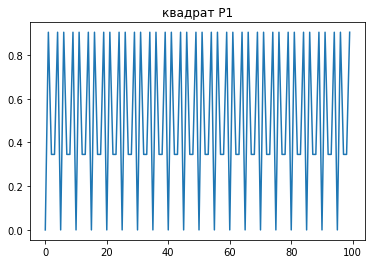

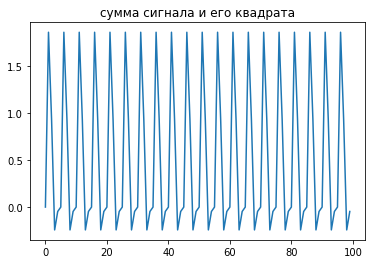

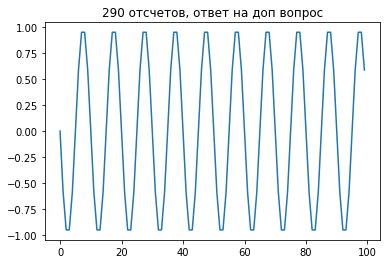

In [41]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
#число периодов на отрезке
P1 = 20
P2 = 290
#количество точек на графике
N = 100
k1 = P1/N
k2 = P2/N
#пустые массивы значений
X = np.array([]) 
Y = np.array([])
Z = np.array([])
w1, w2 = 1, 1 #частоты сигналов

#создание двух гармонических сигналов
for t in range(N):
    X = np.append(X, sin(2*pi*w1*t*k1))
    Y = np.append(Y, sin(2*pi*w2*t*k2))

plt.title("P1")
plt.plot(X)
plt.show()
plt.title("квадрат Р1")
plt.plot(X**2)
plt.show()
plt.title("сумма сигнала и его квадрата")
plt.plot(X + X**2)
plt.show()
plt.title("290 отсчетов, ответ на доп вопрос")
plt.plot(Y)
plt.show()

при P=290 оказываемся в 6й зоне Найквиста, видим 10 периодов
при возведении в квадрат сигнала периодичность менется на N/4
сумма сигнала и его квадрата будет той же частоты, если  в одной и той же зоне найквиста?

#**Упражнение 3. Спектры синусоидального сигнала**
Обычно рассматривают амплитудный, фазовый и
энергетический спектры. Мы остановимся на первом и последнем. Энергетический получается возведением в квадрат амплитудного. В случе цифровых сигналов, спектр получают, используя дискретное преобразование
Фурье (или оптимизированный алгоритм быстрого преобразования Фурье).

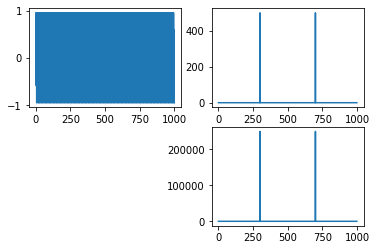

In [3]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

#число периодов на отрезке
P = 300
#количество точек на графике
N = 1000
k = P/N
#пустые массивы значений
X = np.array([]) 
S = np.array([])
w1, w2 = 1, 1 #частоты сигналов

#создание двух гармонического сигнала
for t in range(N):
    X = np.append(X, sin(2*pi*w1*t*k))

S = np.fft.fft(X)

plt.subplot(221)
plt.plot(X)
plt.subplot(222)
plt.plot(abs(S))
plt.subplot(224)
plt.plot(abs(S)**2)
plt.show()

#**Упражнение 4. Импульсная и частотная характеристики цифровых фильтров**

Под цифровым фильтром мы будет понимать дискретную систему с постоянными параметрами, причем ограничимся линейными системами. В таком случае система будет описываться уравнением
$y(n) = -\sum_{k=1}^N a(k)y(n-k)+\sum_{k=0}^M b(k)x(n-k)$

Где x (n) – отсчеты входного сигнала,

y(n)- отсчеты сигнала на выходе системы,

a(k), b(k) – коэффициенты фильтра,

N и M+1 – количество параметров a(k), b(k) соответственно. 

Максимальное число из N и M называется порядком фильтра.

Использование функции **scipy.signal.iirdesign**:

Passband and stopband edge frequencies. For digital filters, these are in the same units as fs. By default, fs is 2 half-cycles/sample, so these are normalized from 0 to 1, where 1 is the Nyquist frequency. For example:

Lowpass: wp = 0.2, ws = 0.3
Highpass: wp = 0.3, ws = 0.2
Bandpass: wp = [0.2, 0.5], ws = [0.1, 0.6]
Bandstop: wp = [0.1, 0.6], ws = [0.2, 0.5]

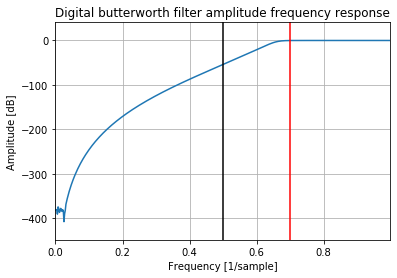

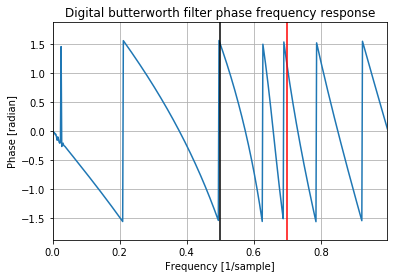

In [4]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy import signal

#частота пропускания и частота заграждения
wp, ws = 0.7, 0.5
# усиление в полосе пропускания и подавление вне её
gpass, gstop = 0.1, 50.0
b, a = signal.iirdesign(wp, ws, gpass, gstop, analog=False, ftype='butter', output='ba')
w, h = signal.freqz(b, a)
w = w/3.14
# plt.plot(w, np.abs(h))
plt.plot(w, 20*np.log10(np.abs(h)))
plt.title('Digital butterworth filter amplitude frequency response')
plt.xlabel('Frequency [1/sample]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(wp, color='red')
plt.axvline(ws, color='black')
plt.show()
plt.plot(w, np.arctan(np.imag(h)/np.real(h)))
# plt.plot(w, 20*np.log10(np.arctan(np.imag(h)/np.real(h))))
plt.title('Digital butterworth filter phase frequency response')
plt.xlabel('Frequency [1/sample]')
plt.ylabel('Phase [radian]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(wp, color='red')
plt.axvline(ws, color='black')
plt.show()

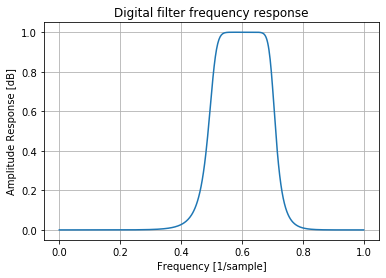

In [5]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
b, a = signal.iirfilter(5, Wn=[0.5, 0.7], rp=5, rs=60, btype='bandpass', ftype='butter')

w, h = signal.freqz(b, a)
w = w/3.14
plt.title('Digital filter frequency response')

x = lambda w, h: plt.plot(w, np.abs(h))
# x = lambda w, h: plt.plot(w, 20*np.log10(np.abs(h)))
x(w, h)
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude Response [dB]')
plt.xlabel('Frequency [1/sample]')
plt.grid()
# plt.xlim([0,1])
plt.show()


**Упражнение 5. Сумма и разность отсчетов как цифровые фильтры **

В этом упражнении реализует два типа обработки
гармонического сигнала: суммирование последних 10 отчетов (предполагая,
что до включения сигнала отсчеты были нулевыми) и вычитание двух последних.

Убедились, что суммарный сигнал представляет собой интегрированный сигнал(т.е пропущенный через ФНЧ), а разностный сигнал - дифференцированный(т.е пропущенный через ФВЧ).

Получается, что такая обработка(сложение и вычитание отсчетов) представляет собой простейший фильтр(ФНЧ и ФВЧ).

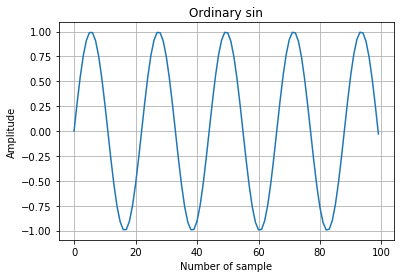

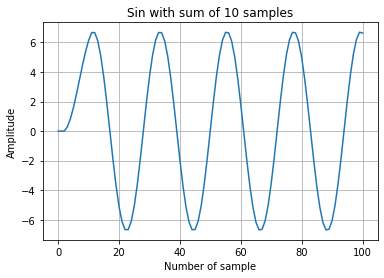

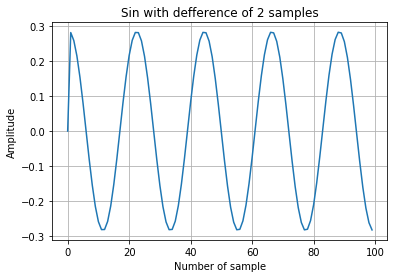

In [6]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy import signal

#число периодов на отрезке
P = 4.55
#количество точек на графике
N = 100
k = P/N
Num = 9
#пустые массивы значений
X = np.zeros(Num) 
S = np.array(0)
D = np.array([])
w1 = 1 #частота сигнала

#создание гармонического сигнала
for t in range(N):
    X = np.append(X, sin(2*pi*w1*t*k))
plt.plot(X[Num:])
plt.grid()
plt.title('Ordinary sin')
plt.xlabel('Number of sample')
plt.ylabel('Amplitude')
plt.show()
#создание суммарного сигнала
for i in range(len(X)-Num):
    S = np.append(S, X[i:i+Num].sum())
plt.plot(S)
plt.grid()
plt.title('Sin with sum of %d samples' % (Num+1))
plt.xlabel('Number of sample')
plt.ylabel('Amplitude')
plt.show()
#создание разностного сигнала
for i in range(len(X)-Num):
    D = np.append(D, X[Num+i]-X[Num-1+i])
plt.plot(D)
plt.grid()
plt.title('Sin with defference of 2 samples')
plt.xlabel('Number of sample')
plt.ylabel('Amplitude')
plt.show()

**Упражнение 6. Сравнение селективности КИХ и БИХ фильтров**

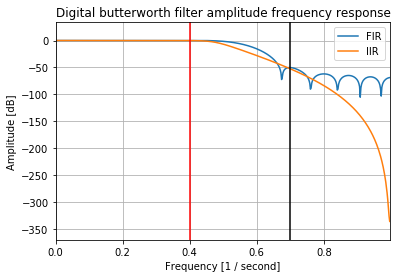

In [7]:
#частота пропускания и частота заграждения
wp, ws = 0.4, 0.7
# усиление в полосе пропускания и подавление вне её
gpass, gstop = 0.1, 50.0
b, a = signal.iirdesign(wp, ws, gpass, gstop, analog=False, ftype='butter', output='ba')
w, h = signal.freqz(b, a)
w = w/3.14

b1 = signal.firwin(len(b)+20, [(wp+ws)/2], pass_zero=True, window='hamming')
w1, h1 = signal.freqz(b1)
w1 = w1/3.14
f, ax = plt.subplots()
# plt.plot(w1,abs(h1))
plt.plot(w1, 20*np.log10(np.abs(h1)))
plt.plot(w, 20*np.log10(np.abs(h)))
# plt.plot(w, np.abs(h))
ax.legend(('FIR', 'IIR'))
plt.title('Digital butterworth filter amplitude frequency response')
plt.xlabel('Frequency [1 / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(wp, color='red')
plt.axvline(ws, color='black')
# plt.ylim([-100,0])
plt.show()

**Упражнение 7. Пример неустойчивого фильтра. Устранение
неустойчивости заменой одного фильтра каскадом из фильтров 2 порядка.**

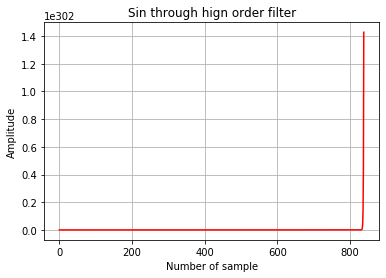

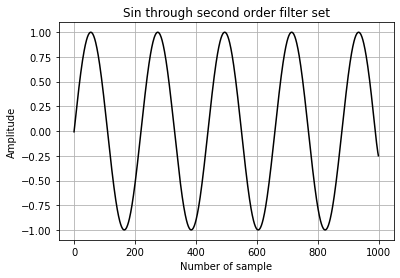

In [49]:
# from widget import interact
#число периодов на отрезке
P = 4.55
#количество точек на графике
N = 1000
k = P/N
#пустые массивы значений
X = np.zeros(0) 
w1 = 1 #частота сигнала

#создание гармонического сигнала
for t in range(N):
    X = np.append(X, sin(2*pi*w1*t*k))

b, a = signal.cheby1(N=60, rp=0.0001, Wn=0.0055, btype='low', analog=False, output='ba')
sos =  signal.cheby1(N=2,  rp=0.0001, Wn=0.0055, btype='low', analog=False, output='sos')
y_tf = signal.lfilter(b, a, X)
y_sos = signal.sosfiltfilt(sos, X)
plt.plot(y_tf, 'r')
plt.title('Sin through hign order filter')
plt.xlabel('Number of sample')
plt.ylabel('Amplitude')
plt.grid()
plt.show()
plt.plot(y_sos, 'k')
plt.grid()
plt.title('Sin through second order filter set')
plt.xlabel('Number of sample')
plt.ylabel('Amplitude')
plt.show()

Вопрос 1.
При увеличении порядка фильтра время задержки сигнала увеличивается

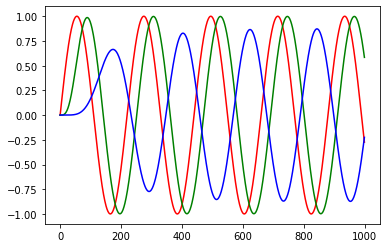

In [50]:
sos1 =  signal.cheby1(N=1, rp=0.0001, Wn=0.0055, btype='low', analog=False, output='sos')
sos3 =  signal.cheby1(N=3, rp=0.0001, Wn=0.0055, btype='low', analog=False, output='sos')
sos5 = signal.cheby1(N=5, rp=0.0001, Wn=0.0055, btype='low', analog=False, output='sos')
y1 =  signal.sosfilt(sos1, X)
y3 =  signal.sosfilt(sos3, X)
y5 = signal.sosfilt(sos5, X)
plt.plot(y1, 'r')
plt.plot(y3, 'g')
plt.plot(y5, 'b')
plt.show()

Вопрос 2. Разные импульсные характеристики
Синий - высокого порядка

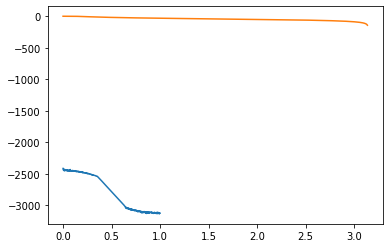

In [51]:
w, h = signal.freqz(b, a)
w = w/3.14
plt.plot(w, 20*np.log10(np.abs(h)))
w1, h1 = signal.sosfreqz(sos)
plt.plot(w1, 20*np.log10(np.abs(h1)))

**Упражнение 8. Пример получения неказуальной системы при занулении
отчетов спектра.**

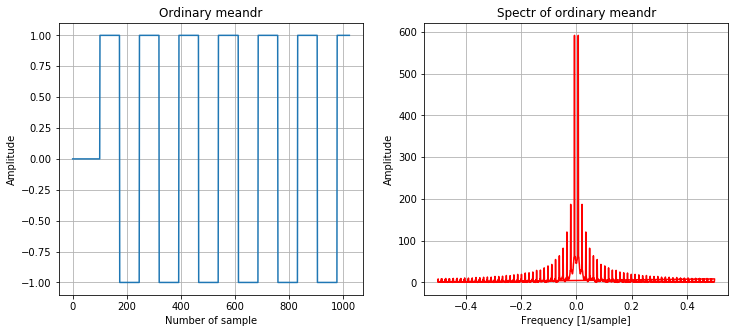

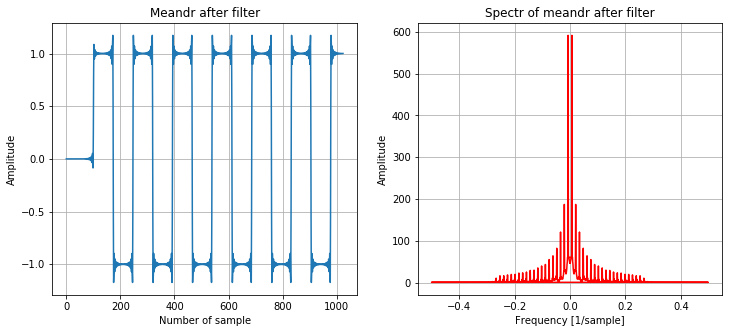

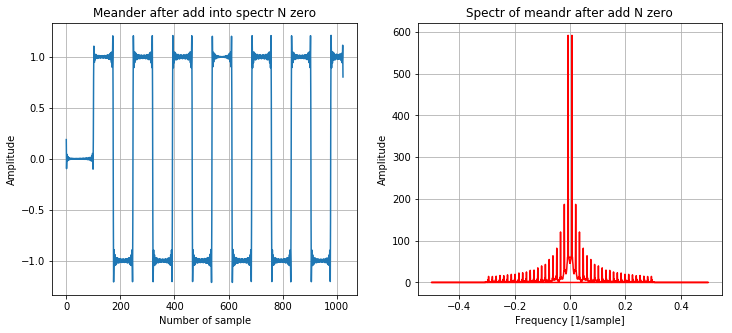

In [10]:
#число периодов на отрезке
P = 7
#количество точек на графике
N = 1024
k = P/N
#пустые массивы значений
X = np.zeros(100) 
w1 = 1 #частота сигнала

#создание гармонического сигнала
for t in range(N-100):
    X = np.append(X, sin(2*pi*w1*t*k))

meandr = np.sign(X)
f, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(meandr)
ax[0].grid()
ax[0].set_title('Ordinary meandr')
ax[0].set_xlabel('Number of sample')
ax[0].set_ylabel('Amplitude')
S = np.fft.fft(meandr)
freq = np.fft.fftfreq(N)
ax[1].plot(freq, abs(S), 'r')
ax[1].grid()
ax[1].set_title('Spectr of ordinary meandr')
ax[1].set_xlabel('Frequency [1/sample]')
ax[1].set_ylabel('Amplitude')
plt.show()

#частота пропускания и частота заграждения
wp, ws = 0.5, 0.6
# усиление в полосе пропускания и подавление вне её
gpass, gstop = 0.1, 20.0
b, a = signal.iirdesign(wp, ws, gpass, gstop, analog=False, ftype='butter', output='ba')
me_after_filt = signal.filtfilt(b, a, meandr)
f1, ax1 = plt.subplots(1, 2, figsize=(12,5))
ax1[0].plot(me_after_filt)
ax1[0].grid()
ax1[0].set_title('Meandr after filter')
ax1[0].set_xlabel('Number of sample')
ax1[0].set_ylabel('Amplitude')

S_after_filt = np.fft.fft(me_after_filt)
freq_after_filt = np.fft.fftfreq(N)

ax1[1].plot(freq, abs(S_after_filt), 'r')
ax1[1].grid()
ax1[1].set_title('Spectr of meandr after filter')
ax1[1].set_xlabel('Frequency [1/sample]')
ax1[1].set_ylabel('Amplitude')
plt.show()

S_zero = S
S_zero[512-200:512+200] = 0
meandr_zero = np.fft.ifft(S_zero)
f2, ax2 = plt.subplots(1, 2, figsize=(12,5))
ax2[0].plot(meandr_zero)
ax2[0].grid()
ax2[0].set_title('Meander after add into spectr N zero')
ax2[0].set_xlabel('Number of sample')
ax2[0].set_ylabel('Amplitude')

ax2[1].plot(freq, abs(S_zero), 'r')
ax2[1].grid()
ax2[1].set_title('Spectr of meandr after add N zero')
ax2[1].set_xlabel('Frequency [1/sample]')
ax2[1].set_ylabel('Amplitude')
plt.show()

**Упражнение 9. Фильтрация меандра.**


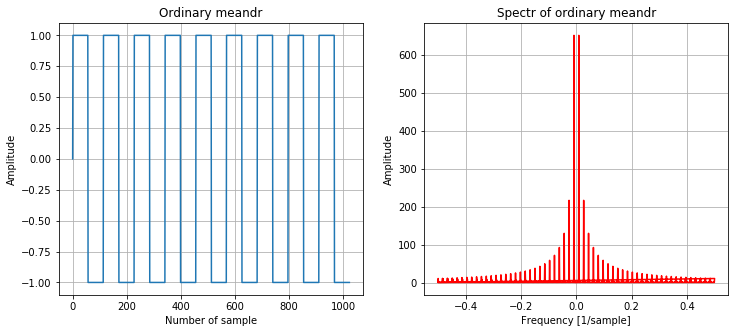

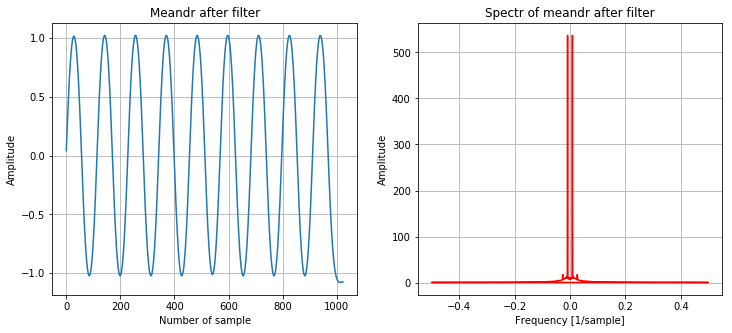

In [11]:
#число периодов на отрезке
P = 9
#количество точек на графике
N = 1024
k = P/N
#пустые массивы значений
X = np.zeros(0) 
w1 = 1 #частота сигнала

#создание гармонического сигнала
for t in range(N):
    X = np.append(X, sin(2*pi*w1*t*k))
meandr = np.sign(X)
f, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(meandr)
ax[0].grid()
ax[0].set_title('Ordinary meandr')
ax[0].set_xlabel('Number of sample')
ax[0].set_ylabel('Amplitude')
S = np.fft.fft(meandr)
freq = np.fft.fftfreq(N)
ax[1].plot(freq, abs(S), 'r')
ax[1].grid()
ax[1].set_title('Spectr of ordinary meandr')
ax[1].set_xlabel('Frequency [1/sample]')
ax[1].set_ylabel('Amplitude')
plt.show()

#частота пропускания и частота заграждения
wp, ws = 0.01, 0.1
# усиление в полосе пропускания и подавление вне её
gpass, gstop = 0.1, 10.0
b, a = signal.iirdesign(wp, ws, gpass, gstop, analog=False, ftype='butter', output='ba')
me_after_filt = signal.filtfilt(b, a, meandr)
f1, ax1 = plt.subplots(1, 2, figsize=(12,5))
ax1[0].plot(me_after_filt)
ax1[0].grid()
ax1[0].set_title('Meandr after filter')
ax1[0].set_xlabel('Number of sample')
ax1[0].set_ylabel('Amplitude')

S_after_filt = np.fft.fft(me_after_filt)
freq_after_filt = np.fft.fftfreq(N)

ax1[1].plot(freq_after_filt, abs(S_after_filt), 'r')
ax1[1].grid()
ax1[1].set_title('Spectr of meandr after filter')
ax1[1].set_xlabel('Frequency [1/sample]')
ax1[1].set_ylabel('Amplitude')
plt.show()

**Упражнение 10. Дополнение нулями последовательности.**

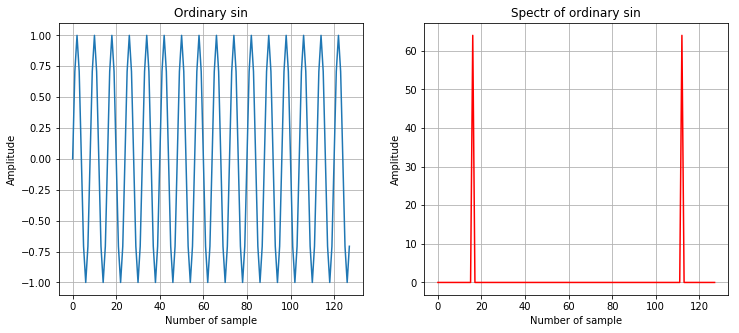

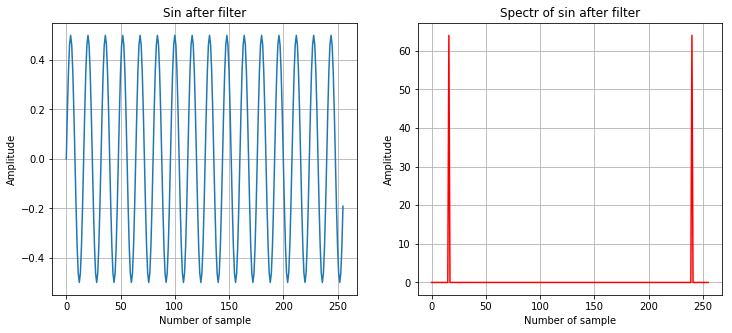

In [12]:
#число периодов на отрезке
P = 16
#количество точек на графике
N = 128
k = P/N
#пустые массивы значений
X = np.zeros(0) 
w1 = 1 #частота сигнала

#создание гармонического сигнала
for t in range(N):
    X = np.append(X, sin(2*pi*w1*t*k))
f, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(X)
ax[0].grid()
ax[0].set_title('Ordinary sin')
ax[0].set_xlabel('Number of sample')
ax[0].set_ylabel('Amplitude')
S = np.fft.fft(X)
freq = np.fft.fftfreq(N)
ax[1].plot(abs(S), 'r')
ax[1].grid()
ax[1].set_title('Spectr of ordinary sin')
ax[1].set_xlabel('Number of sample')
ax[1].set_ylabel('Amplitude')
plt.show()

S_add = np.hstack((S[:64], np.zeros(128), S[64:]))
sin_add = np.fft.ifft(S_add)
freq_add = np.fft.fftfreq(2*N)
f1, ax1 = plt.subplots(1, 2, figsize=(12,5))
ax1[0].plot(sin_add)
ax1[0].grid()
ax1[0].set_title('Sin after filter')
ax1[0].set_xlabel('Number of sample')
ax1[0].set_ylabel('Amplitude')

ax1[1].plot(abs(S_add), 'r')
ax1[1].grid()
ax1[1].set_title('Spectr of sin after filter')
ax1[1].set_xlabel('Number of sample')
ax1[1].set_ylabel('Amplitude')
plt.show()

**Упражнение 11. Децимация сигнала.**

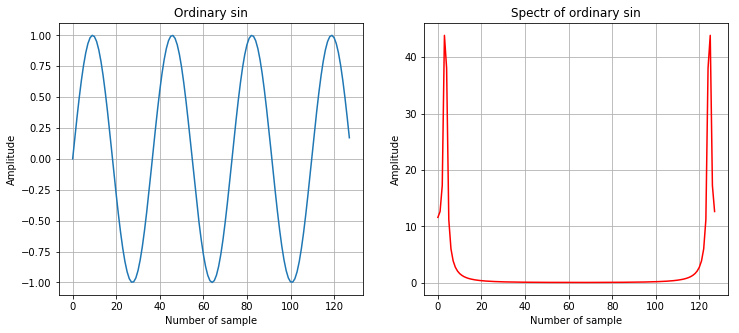

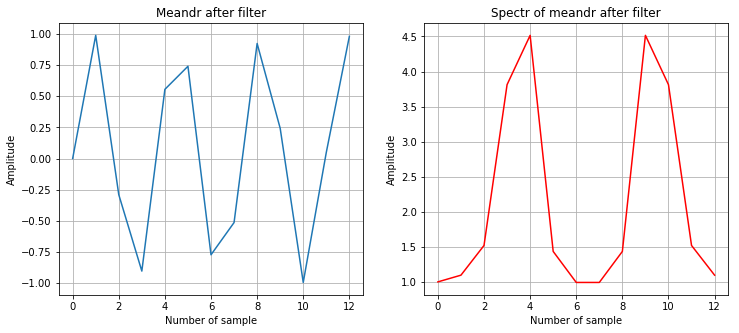

In [13]:
#число периодов на отрезке
P = 3.5
#количество точек на графике
N = 128
k = P/N
#пустые массивы значений
X = np.zeros(0) 
w1 = 1 #частота сигнала
Num = 10
#создание гармонического сигнала
for t in range(N):
    X = np.append(X, sin(2*pi*w1*t*k))
f, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(X)
ax[0].grid()
ax[0].set_title('Ordinary sin')
ax[0].set_xlabel('Number of sample')
ax[0].set_ylabel('Amplitude')
S = np.fft.fft(X)
freq = np.fft.fftfreq(N)
ax[1].plot(abs(S), 'r')
ax[1].grid()
ax[1].set_title('Spectr of ordinary sin')
ax[1].set_xlabel('Number of sample')
ax[1].set_ylabel('Amplitude')
plt.show()

X_decimate = X[::Num]
S_decimate = np.fft.fft(X_decimate)
freq_decimate = np.fft.fftfreq(len(X[::Num]))
f1, ax1 = plt.subplots(1, 2, figsize=(12,5))
ax1[0].plot(X_decimate)
ax1[0].grid()
ax1[0].set_title('Meandr after filter')
ax1[0].set_xlabel('Number of sample')
ax1[0].set_ylabel('Amplitude')

ax1[1].plot(abs(S_decimate), 'r')
ax1[1].grid()
ax1[1].set_title('Spectr of meandr after filter')
ax1[1].set_xlabel('Number of sample')
ax1[1].set_ylabel('Amplitude')
plt.show()

**Упражнение 12. Вставка нулей между отчетами сигнала.**

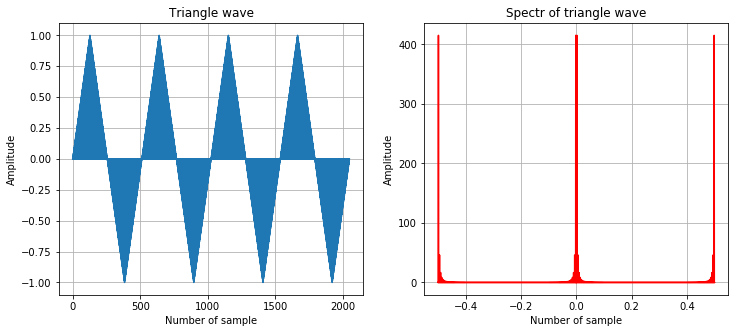

In [27]:
#число периодов на отрезке
P = 4
#количество точек на графике
N = 1024

def triangle(length, amplitude):
    section = length // 4
    for direction in (1, -1):
        for i in range(section):
             yield i * (amplitude / section) * direction
        for i in range(section):
             yield (amplitude - (i * (amplitude / section))) * direction
triangle_wave = list(triangle(N//P, 1))*P
triangle_wave_add_zero = np.array([])
for xi in triangle_wave:
    triangle_wave_add_zero = np.append(triangle_wave_add_zero, xi)
    triangle_wave_add_zero = np.append(triangle_wave_add_zero, 0)
f, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(triangle_wave_add_zero)
ax[0].grid()
ax[0].set_title('Triangle wave')
ax[0].set_xlabel('Number of sample')
ax[0].set_ylabel('Amplitude')

S = np.fft.fft(triangle_wave_add_zero)
freq = np.fft.fftfreq(len(triangle_wave_add_zero))
ax[1].plot(freq, abs(S), 'r')
ax[1].grid()
ax[1].set_title('Spectr of triangle wave')
ax[1].set_xlabel('Number of sample')
ax[1].set_ylabel('Amplitude')
plt.show()
plt.show()

**Упражнение 13. Влияние окна на спектр дополненного нулями
сигнала**

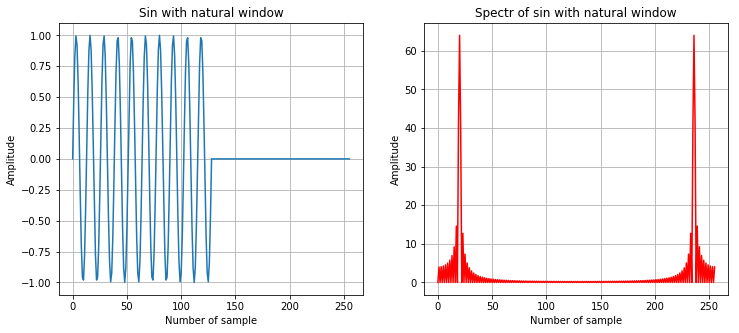

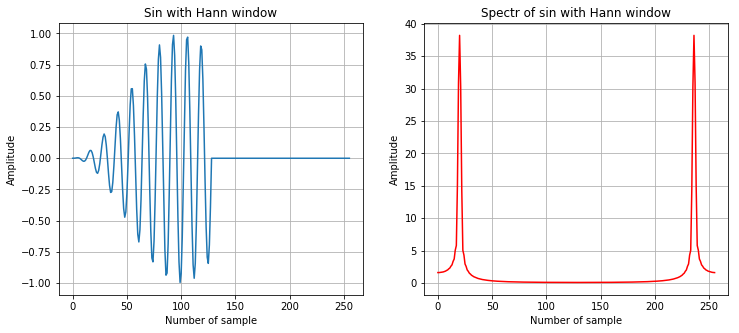

In [230]:
#число периодов на отрезке
P = 10
#количество точек на графике
N = 256
k = 2*P/N
#пустые массивы значений
X = np.zeros(N) 
w1 = 1 #частота сигнала
Num = 10
size = 200
#создание гармонического сигнала
for t in range(N//2):
    X[t] = sin(2*pi*w1*t*k)
W = np.zeros(len(X))
for t in range(size):
    W[t] = 0.5 * (1-cos(2*pi*t/(size-1)))
X_transform = X * W
S = np.fft.fft(X)
freq = np.fft.fftfreq(N)
S_transform = np.fft.fft(X_transform)
f, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(X)
ax[0].grid()
ax[0].set_title('Sin with natural window')
ax[0].set_xlabel('Number of sample')
ax[0].set_ylabel('Amplitude')
# ax[1].semilogy(20*np.log10(abs(S)), 'r')
ax[1].plot(abs(S), 'r')
ax[1].grid()
ax[1].set_title('Spectr of sin with natural window')
ax[1].set_xlabel('Number of sample')
ax[1].set_ylabel('Amplitude')
plt.show()
f1, ax1 = plt.subplots(1, 2, figsize=(12,5))
ax1[0].plot(X_transform)
ax1[0].grid()
ax1[0].set_title('Sin with Hann window')
ax1[0].set_xlabel('Number of sample')
ax1[0].set_ylabel('Amplitude')

ax1[1].plot(abs(S_transform), 'r')
ax1[1].grid()
ax1[1].set_title('Spectr of sin with Hann window')
ax1[1].set_xlabel('Number of sample')
ax1[1].set_ylabel('Amplitude')
plt.show()

**Упражнение 14. Автокорреляционные функции некоторых
сигналов.**

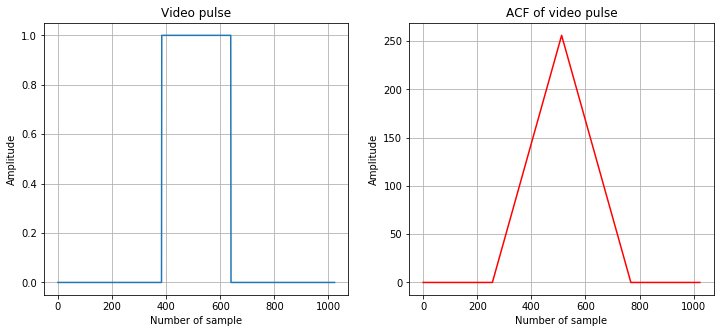

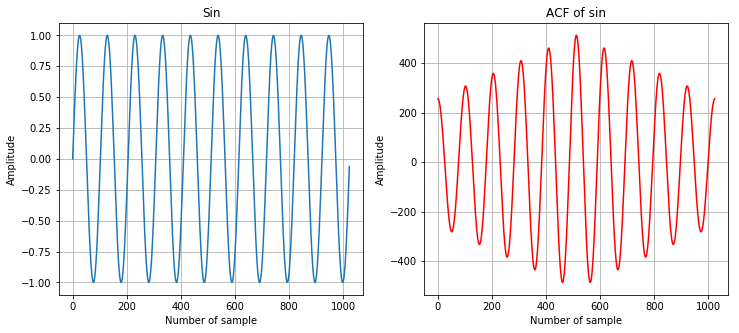

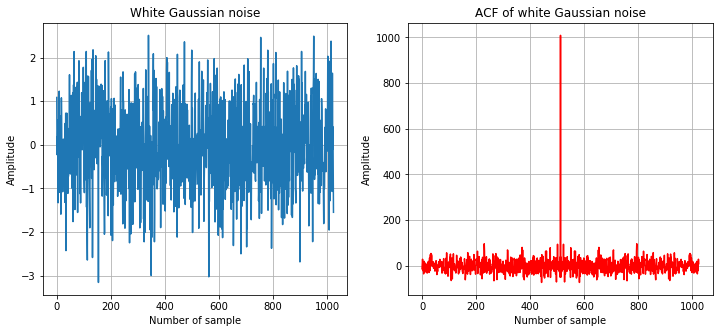

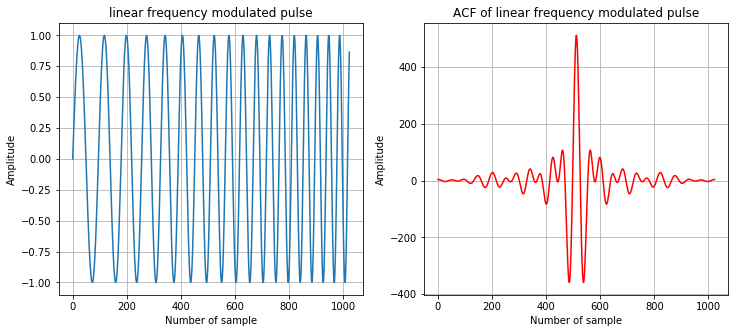

In [101]:
#число периодов на отрезке
P = 10
#количество точек на графике
N = 1024
k = P/N
#пустые массивы значений
X_imp = np.zeros(N)
X_imp[N//2 - N//8:N//2 + N//8] = 1
X_sin = np.zeros(0)
X_WGN = np.random.normal(size=N)
X_LFM = np.zeros(0)
w1 = 1 #частота сигнала

for t in range(N):
    X_sin = np.append(X_sin, sin(2*pi*w1*t*k))
for t in range(N):
    X_LFM = np.append(X_LFM, sin(2*pi*w1*t*k))
    w1+=0.0008
ACF_imp = np.correlate(X_imp, X_imp, mode='same')
ACF_sin = np.correlate(X_sin, X_sin, mode='same')
ACF_WGN = np.correlate(X_WGN, X_WGN, mode='same')
ACF_LFM = np.correlate(X_LFM, X_LFM, mode='same')

f, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(X_imp)
ax[0].grid()
ax[0].set_title('Video pulse')
ax[0].set_xlabel('Number of sample')
ax[0].set_ylabel('Amplitude')
ax[1].plot(ACF_imp, 'r')
ax[1].grid()
ax[1].set_title('ACF of video pulse')
ax[1].set_xlabel('Number of sample')
ax[1].set_ylabel('Amplitude')
plt.show()

f1, ax1 = plt.subplots(1, 2, figsize=(12,5))
ax1[0].plot(X_sin)
ax1[0].grid()
ax1[0].set_title('Sin')
ax1[0].set_xlabel('Number of sample')
ax1[0].set_ylabel('Amplitude')
ax1[1].plot(ACF_sin, 'r')
ax1[1].grid()
ax1[1].set_title('ACF of sin')
ax1[1].set_xlabel('Number of sample')
ax1[1].set_ylabel('Amplitude')
plt.show()

f2, ax2 = plt.subplots(1, 2, figsize=(12,5))
ax2[0].plot(X_WGN)
ax2[0].grid()
ax2[0].set_title('White Gaussian noise')
ax2[0].set_xlabel('Number of sample')
ax2[0].set_ylabel('Amplitude')
ax2[1].plot(ACF_WGN, 'r')
ax2[1].grid()
ax2[1].set_title('ACF of white Gaussian noise')
ax2[1].set_xlabel('Number of sample')
ax2[1].set_ylabel('Amplitude')
plt.show()

f3, ax3 = plt.subplots(1, 2, figsize=(12,5))
ax3[0].plot(X_LFM)
ax3[0].grid()
ax3[0].set_title('linear frequency modulated pulse')
ax3[0].set_xlabel('Number of sample')
ax3[0].set_ylabel('Amplitude')
ax3[1].plot(ACF_LFM, 'r')
ax3[1].grid()
ax3[1].set_title('ACF of linear frequency modulated pulse')
ax3[1].set_xlabel('Number of sample')
ax3[1].set_ylabel('Amplitude')
plt.show()

**Упражнение 15. Выделение сложного сигнала в шуме при помощи
взаимнокорреляционной функции (ВКФ).**

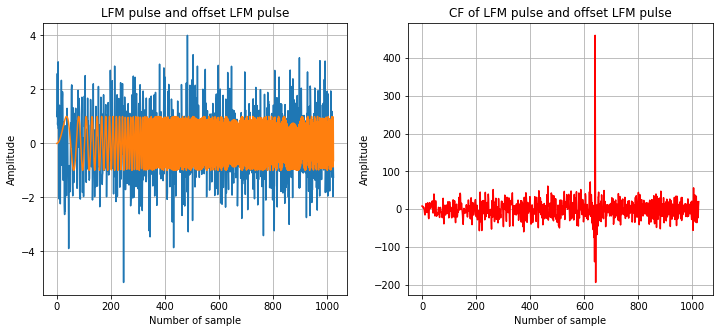

In [151]:
#число периодов на отрезке
P = 100
#количество точек на графике
N = 1024
k = P/N
offset = N//8
X_LFM = np.zeros(0)
X_LFM_N = np.zeros(0)
wd, wu = 0, 2 #частота сигнала
step = (wu-wd)/N
for t in range(N):
    X_LFM = np.append(X_LFM, sin(2*pi*wd*t*k))
    wd+=step
wd = 0
for t in range(0, N+offset):
    X_LFM_N = np.append(X_LFM_N, sin(2*pi*wd*t*k))
    wd+=step

X_LFM_N = X_LFM_N[offset:] + np.random.normal(0, 1 , size=N)
CF = np.correlate(X_LFM, X_LFM_N, mode='same')
f, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(X_LFM_N)
ax[0].plot(X_LFM)
ax[0].grid()
ax[0].set_title('LFM pulse and offset LFM pulse')
ax[0].set_xlabel('Number of sample')
ax[0].set_ylabel('Amplitude')
ax[1].plot(CF, 'r')
ax[1].grid()
ax[1].set_title('CF of LFM pulse and offset LFM pulse')
ax[1].set_xlabel('Number of sample')
ax[1].set_ylabel('Amplitude')
plt.show()

**Упражнение 16. Сравнение автокорреляции и свертки.
Использование свертки для нахождения «зеркальных» сигналов**

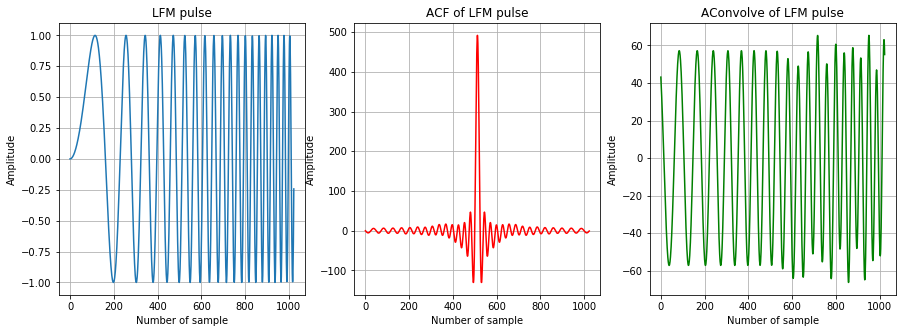

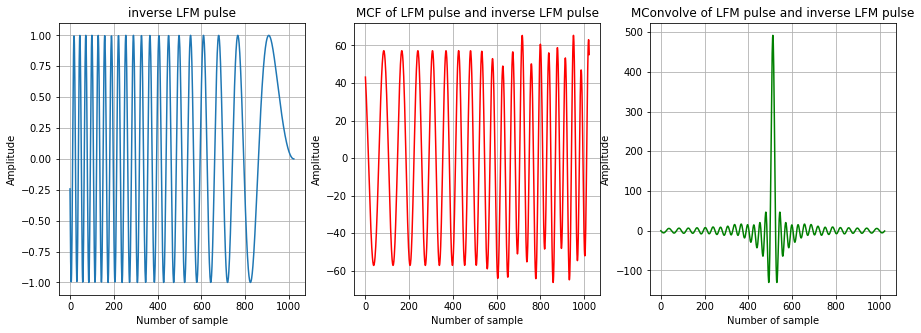

In [161]:
#число периодов на отрезке
P = 10
#количество точек на графике
N = 1024
k = P/N
offset = N//8
X_LFM = np.zeros(0)
wd, wu = 0, 2 #частота сигнала
step = (wu-wd)/N
for t in range(N):
    X_LFM = np.append(X_LFM, sin(2*pi*wd*t*k))
    wd+=step
X_LFM_inv = X_LFM[::-1]
ACF = np.correlate(X_LFM, X_LFM, mode='same')
MCF = np.correlate(X_LFM, X_LFM_inv, mode='same')
AConv = np.convolve(X_LFM, X_LFM, mode='same')
MConv = np.convolve(X_LFM, X_LFM_inv, mode='same')
f, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].plot(X_LFM)
ax[0].grid()
ax[0].set_title('LFM pulse')
ax[0].set_xlabel('Number of sample')
ax[0].set_ylabel('Amplitude')
ax[1].plot(ACF, 'r')
ax[1].grid()
ax[1].set_title('ACF of LFM pulse')
ax[1].set_xlabel('Number of sample')
ax[1].set_ylabel('Amplitude')
ax[2].plot(AConv, 'g')
ax[2].grid()
ax[2].set_title('AConvolve of LFM pulse')
ax[2].set_xlabel('Number of sample')
ax[2].set_ylabel('Amplitude')
plt.show()
f1, ax1 = plt.subplots(1, 3, figsize=(15,5))
ax1[0].plot(X_LFM_inv)
ax1[0].grid()
ax1[0].set_title('inverse LFM pulse')
ax1[0].set_xlabel('Number of sample')
ax1[0].set_ylabel('Amplitude')
ax1[1].plot(MCF, 'r')
ax1[1].grid()
ax1[1].set_title('MCF of LFM pulse and inverse LFM pulse')
ax1[1].set_xlabel('Number of sample')
ax1[1].set_ylabel('Amplitude')
ax1[2].plot(MConv, 'g')
ax1[2].grid()
ax1[2].set_title('MConvolve of LFM pulse and inverse LFM pulse')
ax1[2].set_xlabel('Number of sample')
ax1[2].set_ylabel('Amplitude')
plt.show()

**Упражнение 18. Особенности фильтра Баттерворфа.**

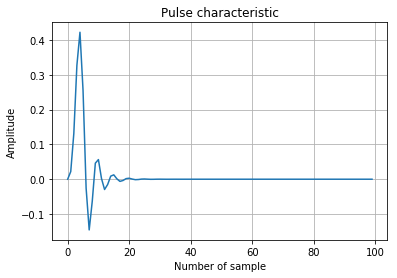

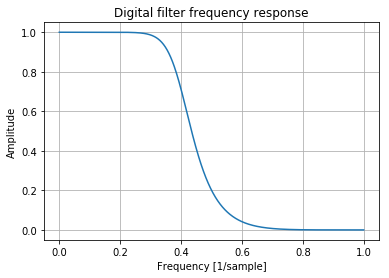

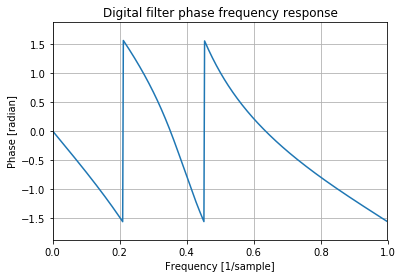

In [201]:
Wn = 0.4
rang = 5
delta = np.zeros(100)
delta[1] = 1
b, a = signal.iirfilter(rang, Wn=Wn, rp=0.001, rs=100, btype='lowpass', ftype='butter')
w, h = signal.freqz(b, a)
w = w/3.14
imp_char = signal.lfilter(b, a, delta)
plt.plot(imp_char)
plt.title('Pulse characteristic')
plt.ylabel('Amplitude')
plt.xlabel('Number of sample')
plt.grid()
plt.show()
plt.plot(w, np.abs(h))
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [1/sample]')
plt.grid()
plt.show()
plt.plot(w, np.arctan(np.imag(h)/np.real(h)))
plt.title('Digital filter phase frequency response')
plt.xlabel('Frequency [1/sample]')
plt.ylabel('Phase [radian]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

**Упражнение 18. Особенности фильтра Чебышева I типа.**

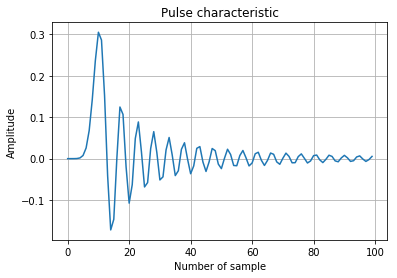

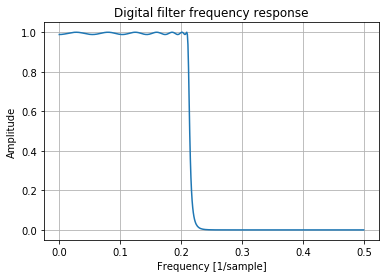

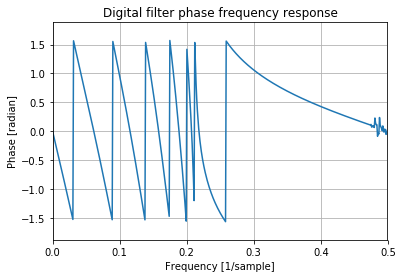

In [216]:
Wn = 0.42
rang = 14
delta = np.zeros(100)
delta[1] = 1
b, a = signal.cheby1(rang, Wn=Wn, rp=0.1, btype='low')
w, h = signal.freqz(b, a)
w = w/3.14/2
imp_char = signal.lfilter(b, a, delta)
plt.plot(imp_char)
plt.title('Pulse characteristic')
plt.ylabel('Amplitude')
plt.xlabel('Number of sample')
plt.grid()
plt.show()
plt.plot(w, np.abs(h))
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [1/sample]')
plt.grid()
plt.show()
plt.plot(w, np.arctan(np.imag(h)/np.real(h)))
plt.title('Digital filter phase frequency response')
plt.xlabel('Frequency [1/sample]')
plt.ylabel('Phase [radian]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

**Упражнение 19. Особенности фильтра Чебышева II типа.
(инверсного Чебышева)**

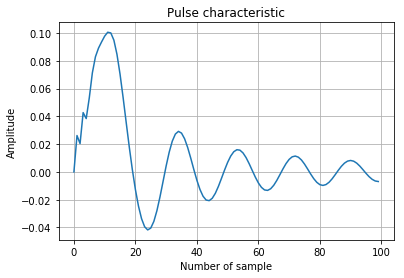

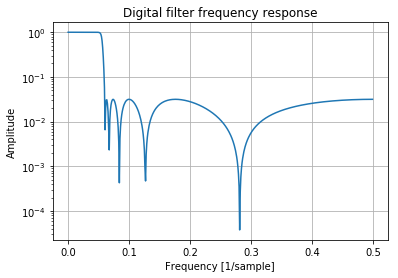

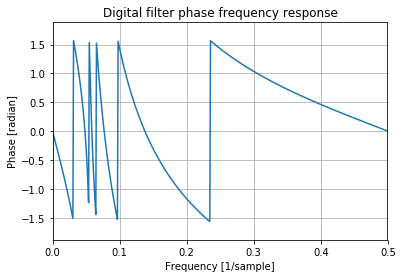

In [220]:
Wn = 0.12
rang = 10
delta = np.zeros(100)
delta[1] = 1
b, a = signal.cheby2(rang, Wn=Wn, rs=30, btype='low')
w, h = signal.freqz(b, a)
w = w/3.14/2
imp_char = signal.lfilter(b, a, delta)
plt.plot(imp_char)
plt.title('Pulse characteristic')
plt.ylabel('Amplitude')
plt.xlabel('Number of sample')
plt.grid()
plt.show()
plt.semilogy(w, np.abs(h))
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [1/sample]')
plt.grid()
plt.show()
plt.plot(w, np.arctan(np.imag(h)/np.real(h)))
plt.title('Digital filter phase frequency response')
plt.xlabel('Frequency [1/sample]')
plt.ylabel('Phase [radian]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

**Упражнение 20. Особенности эллиптических фильтров **

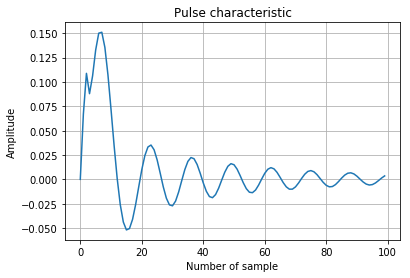

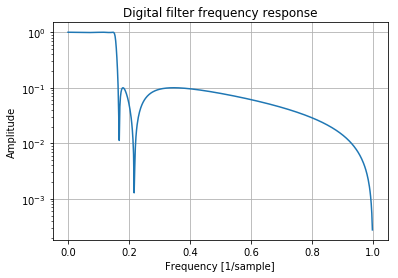

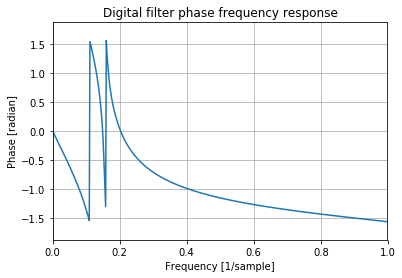

In [203]:
Wn = 0.15
rang = 5
delta = np.zeros(100)
delta[1] = 1
b, a = signal.iirfilter(rang, Wn=Wn, rp=0.1, rs=20, btype='lowpass', ftype='ellip')
w, h = signal.freqz(b, a)
w = w/3.14
imp_char = signal.lfilter(b, a, delta)
plt.plot(imp_char)
plt.title('Pulse characteristic')
plt.ylabel('Amplitude')
plt.xlabel('Number of sample')
plt.grid()
plt.show()
plt.semilogy(w, np.abs(h))
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [1/sample]')
plt.grid()
plt.show()
plt.plot(w, np.arctan(np.imag(h)/np.real(h)))
plt.title('Digital filter phase frequency response')
plt.xlabel('Frequency [1/sample]')
plt.ylabel('Phase [radian]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

**Упражнение 21. Особенности фильтра Бесселя**

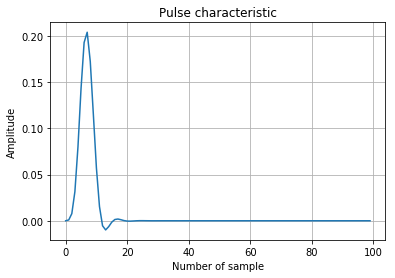

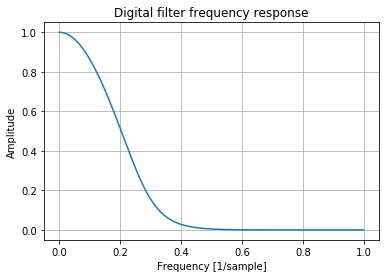

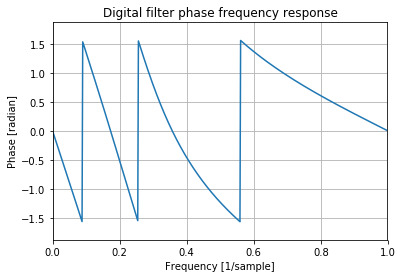

In [226]:
Wn = 0.25
rang = 6
delta = np.zeros(100)
delta[1] = 1
b, a = signal.iirfilter(rang, Wn=Wn, rp=0.001, rs=10, btype='lowpass', ftype='bessel')
w, h = signal.freqz(b, a)
w = w/3.14
imp_char = signal.lfilter(b, a, delta)
plt.plot(imp_char)
plt.title('Pulse characteristic')
plt.ylabel('Amplitude')
plt.xlabel('Number of sample')
plt.grid()
plt.show()
plt.plot(w, np.abs(h))
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [1/sample]')
plt.grid()
plt.show()
plt.plot(w, np.arctan(np.imag(h)/np.real(h)))
plt.title('Digital filter phase frequency response')
plt.xlabel('Frequency [1/sample]')
plt.ylabel('Phase [radian]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

In [ ]:
np.clip()